<h2> Author: João Luiz Bunoro Batista </h2>

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<h3> Loading datasets

In [3]:
data_train = pd.read_csv('/content/gdrive/MyDrive/Competition #1/2. Data/2. Processed/Train.csv')
print(data_train.shape)
data_train.head()

(412, 7)


,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [4]:
data_test = pd.read_csv('/content/gdrive/MyDrive/Competition #1/2. Data/2. Processed/Test.csv')
print(data_test.shape)
data_test.head()

(234, 6)


,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle


In [5]:
stats_train = pd.read_csv('/content/gdrive/MyDrive/Competition #1/2. Data/2. Processed/train_game_statistics.csv')
print(stats_train.shape)
stats_train.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20,21,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1626003, 28)


,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,...,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,...,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
stats_test = pd.read_csv('/content/gdrive/MyDrive/Competition #1/2. Data/2. Processed/test_game_statistics.csv')
print(stats_test.shape)
stats_test.head()

(802098, 24)


,Game_ID,Player_ID,id,X,Y,Team,Half,Season,Manager,Opposition_Team,...,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZUPS2JD2,Player_5CBBVY85,1.0,52.5,34.0,Milky Way,1st half,3,Masashi,Sunflower,...,1.0,0.68,1.02,Player_INTSA2WQ,37.5,30.9,0.0,Milky Way,1.0,-0.002220
1,ID_ZUPS2JD2,Player_5CBBVY85,2.0,52.5,34.0,Milky Way,1st half,3,Masashi,Sunflower,...,0.0,0.68,1.02,Player_5CBBVY85,52.5,34.0,0.0,Milky Way,0.0,0.000000
2,ID_ZUPS2JD2,Player_INTSA2WQ,3.0,37.5,30.9,Milky Way,1st half,3,Masashi,Sunflower,...,0.0,0.70,1.03,Player_INTSA2WQ,37.5,30.9,1.0,Milky Way,1.0,0.000000
3,ID_ZUPS2JD2,Player_INTSA2WQ,4.0,37.5,30.9,Milky Way,1st half,3,Masashi,Sunflower,...,1.0,0.70,1.03,Player_1AJ0QRLU,79.0,57.2,1.0,Sunflower,2.0,0.016906
4,ID_ZUPS2JD2,Player_1AJ0QRLU,5.0,26.0,10.8,Sunflower,1st half,3,Frodo,Milky Way,...,0.0,0.77,1.10,Player_75QJWOU4,79.0,57.2,2.0,Milky Way,3.0,0.000000


<h3> Analyzing training data

In [7]:
print('number of games in seasons 1 and 2:', len(data_train.Game_ID.unique()))
print('seasons:',data_train.Season.unique())
print('possible results:',data_train.Score.unique())
print('Home and Away teams are the same?',(np.sort(data_train['Home Team'].unique()) == np.sort(data_train['Away Team'].unique())).all())

number of games in seasons 1 and 2: 412
seasons: [1 2]
possible results: ['Away win' 'Draw' 'Home Win']
Home and Away teams are the same? True


In [8]:
#percentage of each possible result
100 * data_train['Score'].value_counts() / data_train.shape[0]

Home Win    39.805825
Draw        32.766990
Away win    27.427184
Name: Score, dtype: float64

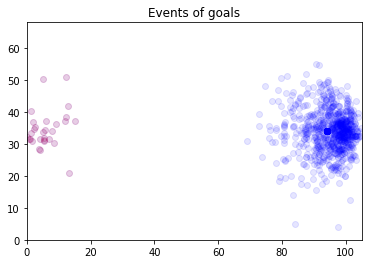

In [9]:
#showing the position of goals
plt.scatter(stats_train[stats_train['Goals_scored'] == 1]['X'],stats_train[stats_train['Goals_scored'] == 1]['Y'],alpha=0.1,c='blue')

#showing the position of own goals
plt.scatter(stats_train[stats_train['Action'] == "Own goal"]['X'],stats_train[stats_train['Action'] == "Own goal"]['Y'],alpha=0.1,c='red')

plt.xlim(0,105), plt.ylim(0,68)
plt.title('Events of goals')
plt.show()

As we can see there are two groups of goals scored: one main cluster with high values of X (consistent with our expectation) and a minor cluster with low values of X. Because there is a clear separation of the minor cluster and it is very unexpected to score goals in too low values of X, a possible explanation is that these events are related to "own goals". Indeed, comparing the events of the minor cluster (i.e. the points with X < 52.5) and events of "own goal" in terms of position, time and quantity, we can see that they are possibly the same events.

In [10]:
#comparison
(stats_train[ (stats_train['Goals_scored'] == 1) & (stats_train['X'] < 52.5)][['X','Start_minutes']].reset_index(drop=True) == stats_train[ (stats_train['Action'] == "Own goal")][['X','Start_minutes']].reset_index(drop=True)).all()

X                True
Start_minutes    True
dtype: bool

Morevoer, for each event of 'goal scored' there is a reciprocal event of 'conceded goal', whose sum of the values of X and Y in each pair are 105 e 68. Figure and the examples in the cells bellow show this pattern.

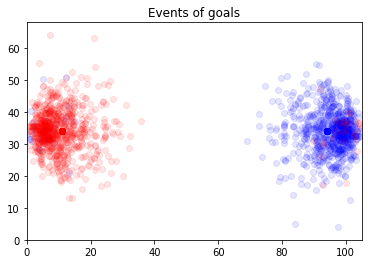

In [11]:
#showing the position of goals
plt.scatter(stats_train[stats_train['Goals_scored'] == 1]['X'],stats_train[stats_train['Goals_scored'] == 1]['Y'],alpha=0.1,c='blue')
plt.scatter(stats_train[stats_train['Goals_conceded'] == 1]['X'],stats_train[stats_train['Goals_conceded'] == 1]['Y'],alpha=0.1,c='red')
plt.xlim(0,105), plt.ylim(0,68)
plt.title('Events of goals')
plt.show()

In [12]:
#checking if the sum of each pair o X e Y are 105 and 68
print((stats_train[stats_train['Goals_scored'] == 1]['X'].reset_index(drop=True) + stats_train[stats_train['Goals_conceded'] == 1]['X'].reset_index(drop=True)==105).all())
print((stats_train[stats_train['Goals_scored'] == 1]['Y'].reset_index(drop=True) + stats_train[stats_train['Goals_conceded'] == 1]['Y'].reset_index(drop=True)==68).all())

True
True


Also, it is possible to verify that the events related to goals (i.e. 'Goals', 'Goals conceded', 'Own goal' and 'Assists) have time duration ('end minutes' - 'start minutes') greater than or equal to 0.5. The other events have time duration less than 0.5. 

In [13]:
goals_events = stats_train[ (stats_train['Action'] == 'Assists') | (stats_train['Action'] == 'Goals') | (stats_train['Action'] == 'Goals conceded') | (stats_train['Action'] == 'Own goal')]
other_events = stats_train[ (stats_train['Action'] != 'Assists') & (stats_train['Action'] != 'Goals') & (stats_train['Action'] != 'Goals conceded') & (stats_train['Action'] != 'Own goal')]

In [14]:
np.sort((goals_events['End_minutes'] - goals_events['Start_minutes']).unique())

array([0.5 , 0.55, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83,
       0.83, 0.83, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84])

In [15]:
np.sort((other_events['End_minutes'] - other_events['Start_minutes']).unique())

array([0.16, 0.16, 0.17, 0.17, 0.17, 0.18, 0.18, 0.19, 0.19, 0.2 , 0.2 ,
       0.2 , 0.21, 0.21, 0.22, 0.22, 0.22, 0.23, 0.23, 0.23, 0.24, 0.24,
       0.25, 0.26, 0.26, 0.27, 0.27, 0.27, 0.28, 0.28, 0.28, 0.29, 0.29,
       0.3 , 0.3 , 0.3 , 0.31, 0.31, 0.32, 0.32, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.34, 0.34,
       0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34])

Finally, below it is shown some examples of events related goals in order to define the final rules.

In [16]:
#Game ID: ID_ZWJJP6T6
goals_of_ID_ZWJJP6T6 = stats_train[ ((stats_train['End_minutes'] - stats_train['Start_minutes']) >= 0.5) & (stats_train['Game_ID'] == 'ID_ZWJJP6T6')]

In [17]:
goals_of_ID_ZWJJP6T6[['Player_ID','X','Y','Team','Action','Start_minutes','End_minutes']]

,Player_ID,X,Y,Team,Action,Start_minutes,End_minutes
14240,Player_NJV0KZ7R,7.0,31.5,Backward,Own goal,61.82,62.65
14241,Player_NJV0KZ7R,7.0,31.5,Backward,Goals,61.82,62.65
14242,Player_1NS0U4R7,98.0,36.5,Coma Pinwheel,Goals conceded,61.82,62.65
14393,Player_38HQ377J,23.4,32.1,Backward,Assists,66.57,67.40
14394,Player_1NS0U4R7,13.3,33.0,Coma Pinwheel,Goals conceded,66.68,67.52
14395,Player_ZOSW4AO5,91.7,35.0,Backward,Goals,66.68,67.52
14991,Player_WN3G1802,105.0,0.0,Coma Pinwheel,Assists,83.97,84.80
14992,Player_38HQ377J,3.6,28.4,Backward,Goals conceded,84.00,84.83
14993,Player_NJV0KZ7R,101.4,39.6,Coma Pinwheel,Goals,84.00,84.83


As it can be seen in this example, there are 3 goals in this match. For each goal, there is also an event of 'Goals conceded', with same start_minutes, end_minutes, complementary X and Y and the 'Team' is the opponent. In case of own goal, there is also and event of 'Own goal' with same X, Y, Team and Start|End minutes.

Therefore, a possible set of rules that can be used to detect goals is as follows:
1. Filter events with duration greater than or equal to 0.5
2. Find pair of events with same Start and End minutes and complementary X e Y (i.e. the sum of X's and Y's are 105 and 68, respectivley)
3. Who scored:
    1. If there are only 2 lines with same start/end minutes: 'direct goal'. The team who scored the goal is the one whose event has the greatest value X
    2. If there are 3 lines with same start/end minutes: 'own goal'. The team who scored the goal is the one whose event has the smallest value X

In [18]:
def goal_detection(game):

    game_aux = game.copy()
    game = game.assign(Diff_time=game['End_minutes'] - game['Start_minutes'])
    game = game[game['Diff_time'] >= 0.5]
    
    #test X e Y position
    tam = len(game)
    Xi = game[['X']].to_numpy() * np.ones([tam,tam])
    Xj = np.transpose(game[['X']].to_numpy()) * np.ones([tam,tam])
    Yi = game[['Y']].to_numpy() * np.ones([tam,tam])
    Yj = np.transpose(game[['Y']].to_numpy()) * np.ones([tam,tam])
    XY_test = np.tril((Xi+Xj == 105)&((Xi>53)|(Xj>53))&(Yi+Yj == 68),-1)

    #time test
    X_start_time = np.tile(game[['Start_minutes']].to_numpy(),tam)
    Y_start_time = np.transpose(np.tile(game[['Start_minutes']].to_numpy(),tam))
    X_end_time = np.tile(game[['End_minutes']].to_numpy(),tam)
    Y_end_time = np.transpose(np.tile(game[['End_minutes']].to_numpy(),tam))
    time_test = np.tril( (X_start_time==Y_start_time) & (X_end_time==Y_end_time) ,-1)

    test = (XY_test & time_test) * 1
    d = np.where(test==1)
    listOfCoordinates= list(zip(d[0], d[1]))

    listOfGoals = {}
    listOfStarminutes = {}
    count = 0
    for i in range(0,len(listOfCoordinates)):
        aux = {}
        if game.iloc[listOfCoordinates[i][0]]['Start_minutes'] not in listOfStarminutes.values():
            aux['player1'] = game.iloc[listOfCoordinates[i][0]]['Player_ID']
            aux['player2'] = game.iloc[listOfCoordinates[i][1]]['Player_ID']
            aux['row_player1_team'] = game.iloc[listOfCoordinates[i][0]]['Team']
            aux['row_player2_team'] = game.iloc[listOfCoordinates[i][1]]['Team']
            aux['real_player1_team'] = game_aux[game_aux['Player_ID'] == aux['player1']]['Team'].value_counts().idxmax()
            aux['real_player2_team'] = game_aux[game_aux['Player_ID'] == aux['player2']]['Team'].value_counts().idxmax()
            aux['X_player1'] = game.iloc[listOfCoordinates[i][0]]['X']
            aux['Y_player1'] = game.iloc[listOfCoordinates[i][0]]['Y']
            aux['X_player2'] = game.iloc[listOfCoordinates[i][1]]['X']
            aux['Y_player2'] = game.iloc[listOfCoordinates[i][1]]['Y']
            aux['Start_minutes'] = game.iloc[listOfCoordinates[i][0]]['Start_minutes']
            aux['End_minutes'] = game.iloc[listOfCoordinates[i][0]]['End_minutes']
            aux_coords = []
            for j in range(0,len(listOfCoordinates)):
                aux_coords = aux_coords + list(listOfCoordinates[j])
            aux_coords = [*set(aux_coords)]
            aux_df = game.iloc[aux_coords]
            n_lines = len(aux_df[ (aux_df['Start_minutes'] == aux['Start_minutes'])  &  (aux_df['End_minutes'] == aux['End_minutes']) & ( ( (aux_df['X'] == aux['X_player1']) & (aux_df['Y'] == aux['Y_player1']) ) | ((aux_df['X'] == aux['X_player2']) & (aux_df['Y'] == aux['Y_player2'])) ) ])
            if n_lines == 3:
                if aux['X_player1'] < aux['X_player2']:
                    aux['Team'] = aux['row_player1_team']
                    aux['Coordinate'] = listOfCoordinates[i][0]
                else:
                    aux['Team'] = aux['row_player2_team']
                    aux['Coordinate'] = listOfCoordinates[i][1]
            else:
                if (aux['row_player1_team'] != aux['real_player1_team']) | (aux['row_player2_team'] != aux['real_player2_team']):
                    print(aux['row_player1_team'],aux['row_player2_team'],game.iloc[0]['Game_ID'])
                if aux['X_player1'] > aux['X_player2']:
                    aux['Team'] = aux['row_player1_team']
                    aux['Coordinate'] = listOfCoordinates[i][0]
                else:
                    aux['Team'] = aux['row_player2_team']
                    aux['Coordinate'] = listOfCoordinates[i][1]
            listOfGoals[count] = aux
            listOfStarminutes[count] = aux['Start_minutes']
            count = count + 1

    return listOfGoals, listOfCoordinates

<h3> Detecting goals for train dataset and verifying the accuracy

In [19]:
#removing columns with NaNs and duplicated rows
print(stats_train.shape)
stats_train = stats_train.dropna(axis = 1, how='all')
stats_train = stats_train.drop_duplicates()
print(stats_train.shape)
stats_train.head()

(1626003, 28)
(1622260, 28)


,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,...,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,...,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
Game_IDs = stats_train['Game_ID'].unique()
data_train_output = data_train.copy()
data_train_output = data_train_output.sort_values(by='Game_ID',ascending=False)
score = []
home_team_goals = []
away_team_goals = []

for i in range(0,len(Game_IDs)):
    print(i,"of",len(Game_IDs), end = "\r")
    home_goals = 0
    away_goals = 0
    game = stats_train[stats_train['Game_ID'] == Game_IDs[i]]
    goals, coordinates = goal_detection(game)
    home_team = data_train[data_train['Game_ID'] == Game_IDs[i]]['Home Team'].iloc[0]
    away_team = data_train[data_train['Game_ID'] == Game_IDs[i]]['Away Team'].iloc[0]
    if len(goals) == 0:
        score.append('Draw')
        home_team_goals.append(home_goals)
        away_team_goals.append(away_goals)
    if len(goals) > 0:
        for j in range(0,len(goals)):
            if goals[j]['Team'] == home_team:
                home_goals = home_goals + 1
            else:
                away_goals = away_goals + 1
        if home_goals > away_goals:
            score.append('Home Win')
        elif home_goals == away_goals:
            score.append('Draw')
        else:
            score.append('Away win')
        home_team_goals.append(home_goals)
        away_team_goals.append(away_goals)
        
data_train_output['game_id'] = Game_IDs
data_train_output['predicted_score'] = score
data_train_output['predicted_home_team_goals'] = home_team_goals
data_train_output['predicted_away_team_goals'] = away_team_goals

data_train_output['real_home_team_goals'] = [stats_train[ (stats_train['Game_ID'] == data_train_output.iloc[x]['Game_ID']) & (stats_train['Team'] == data_train_output.iloc[x]['Home Team']) ]['Goals_scored'].sum() for x in range(0,len(data_train_output))]
data_train_output['real_away_team_goals'] = [stats_train[ (stats_train['Game_ID'] == data_train_output.iloc[x]['Game_ID']) & (stats_train['Team'] == data_train_output.iloc[x]['Away Team']) ]['Goals_scored'].sum() for x in range(0,len(data_train_output))]
data_train_output = data_train_output.assign(flag_home_team_goals=data_train_output['real_home_team_goals']==data_train_output['predicted_home_team_goals'])
data_train_output = data_train_output.assign(flag_away_team_goals=data_train_output['real_away_team_goals']==data_train_output['predicted_away_team_goals'])

In [21]:
data_train_output

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score,game_id,predicted_score,predicted_home_team_goals,predicted_away_team_goals,real_home_team_goals,real_away_team_goals,flag_home_team_goals,flag_away_team_goals
123,2017-12-06,2,39.0,ID_ZZKYYPVY,Backward,Circinus,Home Win,ID_ZZKYYPVY,Home Win,2,1,2.0,1.0,True,True
145,2018-01-30,2,103.0,ID_ZYI3C0HF,Coma Pinwheel,Sunflower,Away win,ID_ZYI3C0HF,Away win,0,3,0.0,3.0,True,True
163,2016-08-14,1,130.0,ID_ZWPPN4W1,Eye of Sauron,Butterfly,Away win,ID_ZWPPN4W1,Away win,0,1,0.0,1.0,True,True
126,2018-02-20,2,116.0,ID_ZWJJP6T6,Backward,Coma Pinwheel,Home Win,ID_ZWJJP6T6,Home Win,2,1,2.0,1.0,True,True
170,2017-02-19,1,36.0,ID_ZWD4FQ05,Butterfly,Sombrero,Draw,ID_ZWD4FQ05,Draw,2,2,2.0,2.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2018-01-23,2,84.0,ID_0A2WEVY3,Comet,Cosmos Redshift 7,Away win,ID_0A2WEVY3,Away win,0,2,0.0,2.0,True,True
99,2018-05-04,2,186.0,ID_06QXUEYD,Triangulum,Cigar,Home Win,ID_06QXUEYD,Home Win,2,1,2.0,1.0,True,True
37,2017-11-21,2,24.0,ID_04T9W310,Andromeda,Cigar,Draw,ID_04T9W310,Draw,2,2,2.0,2.0,True,True
112,2016-11-06,1,30.0,ID_00J124MI,Backward,Medusa Merger,Draw,ID_00J124MI,Draw,0,0,0.0,0.0,True,True


In [22]:
#verifying if predicted and real goals are the same
print(data_train_output['flag_home_team_goals'].all())
print(data_train_output['flag_away_team_goals'].all())

True
True


As it can be seen, these simples rules were able to correctly detect all goals for every match in the train dataset.

<h3> Detecting goals for test dataset and creating the submission files

For each match there are thousands of events. However, in the test dataset there are 22 games with just a few rows, as it can be seen in the distribution below. Most of the informations in these games does not make sense or is blank (e.g.: the values of X are equal to 300). This 22 games will be called as 'error games' (the other games will be called as 'valid games').

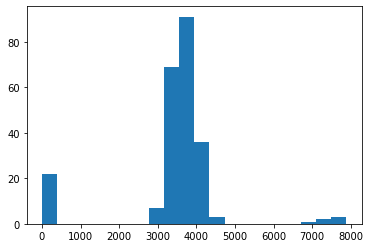

Number of matches with few rows: 22


In [23]:
plt.hist(stats_test['Game_ID'].value_counts().to_list(),20)
plt.show()
print('Number of matches with few rows:',(stats_test['Game_ID'].value_counts()<20).sum())

In [24]:
#separating the error games (22 games)
error_games = stats_test[stats_test['X'] > 105]['Game_ID'].unique()
valid_games = stats_test[stats_test['X'] <= 105]['Game_ID'].unique()

In [25]:
stats_test_valid = stats_test[~stats_test['Game_ID'].isin(error_games)]
stats_test_error = stats_test[stats_test['Game_ID'].isin(error_games)]

In [26]:
#removing columns with NaNs and duplicated rows 
print(stats_test_valid.shape)
stats_test_valid = stats_test_valid.dropna(how='any',axis=1)
stats_test_valid = stats_test_valid[['Game_ID','Player_ID','id','X','Y','Team','Start_minutes','End_minutes']]
stats_test_valid = stats_test_valid.drop_duplicates()
print(stats_test_valid.shape)

(802006, 24)
(802006, 8)


In [27]:
#Detecting goals for valid games using the function 'goal_detection'
Game_IDs = valid_games
data_test_output = pd.DataFrame()
score = []
home_team_goals = []
away_team_goals = []

for i in range(0,len(Game_IDs)):
    print(i,"of",len(Game_IDs), end = "\r")
    home_goals = 0
    away_goals = 0
    game = stats_test[stats_test['Game_ID'] == Game_IDs[i]]
    goals, coordinates = goal_detection(game)
    home_team = data_test[data_test['Game_ID'] == Game_IDs[i]]['Home Team'].iloc[0]
    away_team = data_test[data_test['Game_ID'] == Game_IDs[i]]['Away Team'].iloc[0]
    if len(goals) == 0:
        score.append('Draw')
        home_team_goals.append(home_goals)
        away_team_goals.append(away_goals)
    if len(goals) > 0:
        for j in range(0,len(goals)):
            if goals[j]['Team'] == home_team:
                home_goals = home_goals + 1
            else:
                away_goals = away_goals + 1
        if home_goals > away_goals:
            score.append('Home Win')
        elif home_goals == away_goals:
            score.append('Draw')
        else:
            score.append('Away win')
        home_team_goals.append(home_goals)
        away_team_goals.append(away_goals)
    
data_test_output['game_id'] = Game_IDs
data_test_output['predicted_score'] = score
data_test_output['predicted_home_team_goals'] = home_team_goals
data_test_output['predicted_away_team_goals'] = away_team_goals

<h3> Final Submission 1

Submission 1 considers:
1. For 'valid games': based on the goals detected, it is possible to predict the result of the games. However, althout it was achieved 100% of accuracy in the train dataset, it is not possible to consider that the rules are able to correct detect all goals events. For example, unexpected goals made in X < 52.5 will be assigned to the wrong teams. Also, any incorrect information in the train dataset (quality of the data measured, innacuracy, etc) could change de prediction of the results. Thus, to avoid overfitiing and high impact on the score, this approach will consider probabilies of 99% (arbitrary value), instead of 100%. For example, in an especific game after predicting the goals, it is verified that the home team won the game by 1x0. In this case, the output will be (0.005,0.005,0.99) instead of (0,0,1).
2. For 'error games': because these rules are not able to predict the goals in this case, the output for all these games will assume the historial average of seasons 1 and 2, that is (0.27,0.33,0.40).

In [28]:
output_test = pd.get_dummies(data_test_output['predicted_score'])
output_test['Game_ID'] = data_test_output['game_id']
output_test = output_test[['Game_ID','Away win','Draw','Home Win']]
aux = pd.DataFrame(data=np.ones([len(error_games),1])*[0.27,0.33,0.4],columns=['Away win','Draw','Home Win'])
aux['Game_ID'] = error_games
aux = aux[['Game_ID','Away win','Draw','Home Win']]
output_test = output_test.replace({0:0.005,1:0.99})
output_test

,Game_ID,Away win,Draw,Home Win
0,ID_ZUPS2JD2,0.005,0.990,0.005
1,ID_ZTDZNU6I,0.005,0.990,0.005
2,ID_ZRZC49M1,0.005,0.990,0.005
3,ID_ZQOB9ZQL,0.990,0.005,0.005
4,ID_ZMO6O1V6,0.005,0.990,0.005
...,...,...,...,...
207,ID_08N8KYTM,0.005,0.005,0.990
208,ID_06SV1XSM,0.005,0.990,0.005
209,ID_064HV3UA,0.005,0.005,0.990
210,ID_05YW7A1R,0.005,0.990,0.005


In [29]:
output_test.append(aux).to_csv('final_submission1.csv',index=False)

<h3> Final submission 2

Submission 2 considers:
1. For 'valid games': the same of submission 1, but using probabilities equal to 0% or 100% (risk of overfitting!).
2. For 'error games': it is assumed that the rows of the 22 games represents events of goals ('goal scored' and 'goal conceded'). This assumption is based on the fact that the events appears in pairs with same 'Start_minutes' (see the first ordered lines below). Thus, if a game has an odd number of pairs, there is a winner in this game (the game can not end in draw) and the output will be assumed as (0.5,0,0.5). If the number of pairs is even, the output will be assumed as (0.33,0.33,0.33). 

In [30]:
stats_test_error.sort_values(by=['Game_ID','Start_minutes'])[['Game_ID','Player_ID','Team','Start_minutes']].head(20)

,Game_ID,Player_ID,Team,Start_minutes
764589,ID_133YXY0T,Player_83RWFR2C,Tadpole,69.0
764590,ID_133YXY0T,Player_X982WR9W,Backward,69.0
764587,ID_172V2IXW,Player_X982WR9W,Tadpole,85.0
764588,ID_172V2IXW,Player_77YKCHA6,Needle,85.0
724536,ID_2ZK5TE39,Player_X982WR9W,Circinus,NaN
724537,ID_2ZK5TE39,Player_X982WR9W,Malin 1,NaN
692069,ID_530FN5PE,Player_8K1C68F7,Andromeda,1.0
692072,ID_530FN5PE,Player_X982WR9W,Circinus,1.0
692068,ID_530FN5PE,Player_XJ3FRT39,Circinus,39.0
692070,ID_530FN5PE,Player_X982WR9W,Andromeda,39.0


In [31]:
output_test = pd.get_dummies(data_test_output['predicted_score'])
output_test['Game_ID'] = data_test_output['game_id']
output_test = output_test[['Game_ID','Away win','Draw','Home Win']]
aux = pd.DataFrame(data=np.array([[0.5,0,0.5] if x%2 > 0 else [0.33,0.33,0.33] for x in (stats_test_error.Game_ID.value_counts()/2).loc[error_games].to_list()]),columns=['Away win','Draw','Home Win'])
aux['Game_ID'] = error_games
aux = aux[['Game_ID','Away win','Draw','Home Win']]
output_test

,Game_ID,Away win,Draw,Home Win
0,ID_ZUPS2JD2,0,1,0
1,ID_ZTDZNU6I,0,1,0
2,ID_ZRZC49M1,0,1,0
3,ID_ZQOB9ZQL,1,0,0
4,ID_ZMO6O1V6,0,1,0
...,...,...,...,...
207,ID_08N8KYTM,0,0,1
208,ID_06SV1XSM,0,1,0
209,ID_064HV3UA,0,0,1
210,ID_05YW7A1R,0,1,0


In [32]:
output_test.append(aux).to_csv('final_submission2.csv',index=False)